<a href="https://colab.research.google.com/github/guptaa98/Kaggle-Notebooks/blob/master/Project_Phase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive, files
drive.mount('/content/drive/')

Mounted at /content/drive/


# Explore all the necessary libraries

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import warnings
warnings.filterwarnings("ignore")
from numpy import sqrt 
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Project phase/Sales_project_phaseII.csv')

In [4]:
df.head()

,Unnamed: 0,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,0,0,Namibia,0,0,2,3604,668.27,502.54,2408445.08,1811154.16,597290.92,2015,8,31,2015,10,12
1,1,1,Iceland,11,1,3,8435,255.28,159.42,2153286.80,1344707.70,808579.10,2010,11,20,2011,1,9
2,2,1,Russia,1,1,1,4848,421.89,364.69,2045322.72,1768017.12,277305.60,2017,6,22,2017,6,25
3,3,1,Moldova,1,1,1,7225,421.89,364.69,3048155.25,2634885.25,413270.00,2012,2,28,2012,3,20
4,4,1,Malta,9,1,2,1975,205.70,117.11,406257.50,231292.25,174965.25,2010,8,12,2010,9,13


In [5]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [6]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,0,Namibia,0,0,2,3604,668.27,502.54,2408445.08,1811154.16,597290.92,2015,8,31,2015,10,12
1,1,Iceland,11,1,3,8435,255.28,159.42,2153286.80,1344707.70,808579.10,2010,11,20,2011,1,9
2,1,Russia,1,1,1,4848,421.89,364.69,2045322.72,1768017.12,277305.60,2017,6,22,2017,6,25
3,1,Moldova,1,1,1,7225,421.89,364.69,3048155.25,2634885.25,413270.00,2012,2,28,2012,3,20
4,1,Malta,9,1,2,1975,205.70,117.11,406257.50,231292.25,174965.25,2010,8,12,2010,9,13


In [7]:
df.shape

(43426, 17)

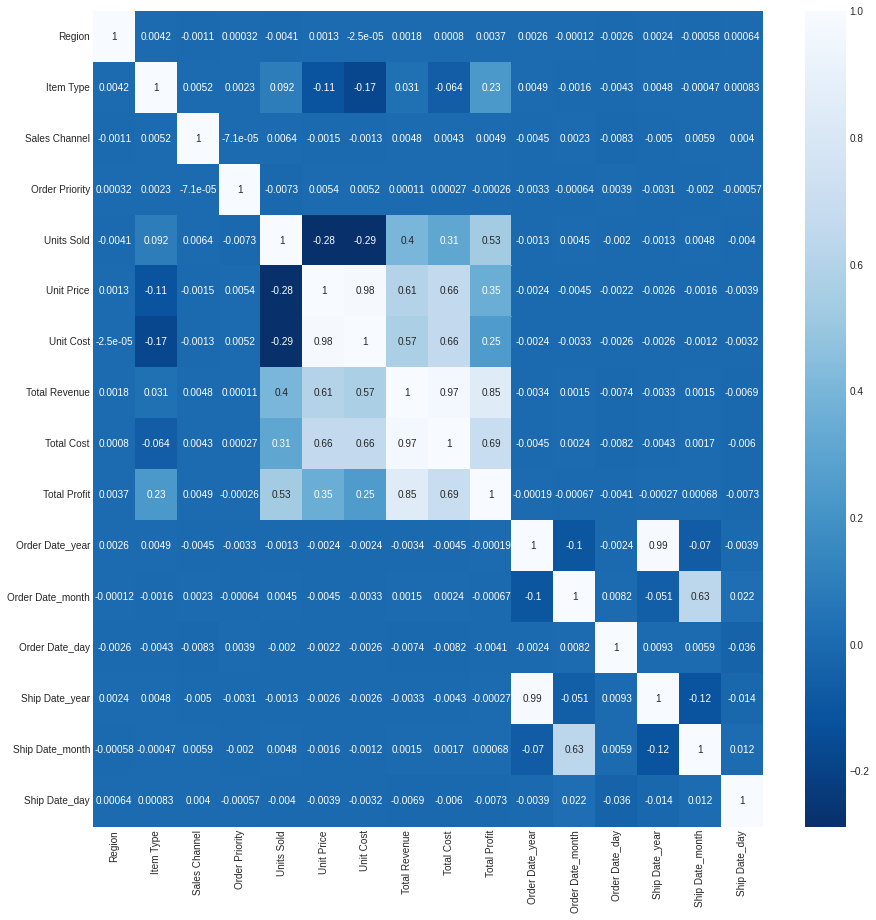

In [8]:
plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), cmap = 'Blues_r',annot = True)

# Splitting the dataset

After peforming the **Data Analysis**, **Data Cleaning**, **Data Preprocessing** on our dataset, it's time to finally split the dataset into train and test dataset.
We'll use sklearn train_test_split and split our dataset into 70:30 ratio for train and test respectively.

In [9]:
x = df.drop('Total Profit',axis = 1)
y = pd.DataFrame()
y = df['Total Profit']

In [10]:
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,0,Namibia,0,0,2,3604,668.27,502.54,2408445.08,1811154.16,2015,8,31,2015,10,12
1,1,Iceland,11,1,3,8435,255.28,159.42,2153286.80,1344707.70,2010,11,20,2011,1,9
2,1,Russia,1,1,1,4848,421.89,364.69,2045322.72,1768017.12,2017,6,22,2017,6,25
3,1,Moldova,1,1,1,7225,421.89,364.69,3048155.25,2634885.25,2012,2,28,2012,3,20
4,1,Malta,9,1,2,1975,205.70,117.11,406257.50,231292.25,2010,8,12,2010,9,13


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [12]:
x_train.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
37319,5,Papua New Guinea,11,1,4,626,255.28,159.42,159805.28,99796.92,2015,7,13,2015,8,30
40787,0,Tanzania,2,0,4,6139,9.33,6.92,57276.87,42481.88,2015,1,29,2015,3,14
24534,1,Liechtenstein,4,1,1,5946,154.06,90.93,916040.76,540669.78,2013,3,11,2013,4,3
1944,1,Vatican City,0,1,2,3637,668.27,502.54,2430497.99,1827737.98,2017,4,4,2017,5,20
17244,2,Malaysia,5,1,4,5410,81.73,56.67,442159.30,306584.70,2015,8,16,2015,9,27


In [13]:
x_test.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
16413,0,Benin,11,1,1,1361,255.28,159.42,347436.08,216970.62,2014,10,17,2014,11,27
21366,4,Honduras,2,0,3,219,9.33,6.92,2043.27,1515.48,2012,4,28,2012,5,5
30446,0,Central African Republic,3,0,2,3739,437.20,263.33,1634690.80,984590.87,2013,11,3,2013,11,25
32051,1,Czech Republic,3,0,1,3928,437.20,263.33,1717321.60,1034360.24,2017,5,27,2017,6,27
4277,2,Bhutan,7,0,1,544,152.58,97.44,83003.52,53007.36,2010,12,12,2010,12,30


In [14]:
# Import label encoder 
from sklearn import preprocessing   
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()   
# Encode labels in column 'Country'. 
x_train['Country']= label_encoder.fit_transform(x_train['Country'])
x_test['Country']= label_encoder.transform(x_test['Country'])

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
x_train[['Region','Country','Item Type','Sales Channel','Order Priority','Total Revenue','Total Cost']] = scaler.fit_transform(x_train[['Region','Country','Item Type','Sales Channel','Order Priority','Total Revenue','Total Cost']])
x_test[['Region','Country','Item Type','Sales Channel','Order Priority','Total Revenue','Total Cost']] = scaler.transform(x_test[['Region','Country','Item Type','Sales Channel','Order Priority','Total Revenue','Total Cost']])


In [16]:
x_train[['Units Sold','Unit Price','Unit Cost']] = scaler.fit_transform(x_train[['Units Sold','Unit Price','Unit Cost']])
x_test[['Units Sold','Unit Price','Unit Cost']] = scaler.transform(x_test[['Units Sold','Unit Price','Unit Cost']])

In [17]:
x_train[['Order Date_year','Order Date_month','Order Date_day','Ship Date_year','Ship Date_month','Ship Date_day']] = scaler.fit_transform(x_train[['Order Date_year','Order Date_month','Order Date_day','Ship Date_year','Ship Date_month','Ship Date_day']])
x_test[['Order Date_year','Order Date_month','Order Date_day','Ship Date_year','Ship Date_month','Ship Date_day']] = scaler.transform(x_test[['Order Date_year','Order Date_month','Order Date_day','Ship Date_year','Ship Date_month','Ship Date_day']])

In [18]:
x_train.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
37319,0.833333,0.679348,1.000000,1.0,1.000000,0.062506,0.373251,0.294379,0.051061,0.036887,0.714286,0.545455,0.400000,0.714286,0.636364,0.966667
40787,0.000000,0.880435,0.181818,0.0,1.000000,0.613861,0.000000,0.000000,0.018295,0.015698,0.714286,0.000000,0.933333,0.714286,0.181818,0.433333
24534,0.166667,0.489130,0.363636,1.0,0.000000,0.594559,0.219641,0.162169,0.292737,0.199879,0.428571,0.181818,0.333333,0.428571,0.272727,0.066667
1944,0.166667,0.978261,0.000000,1.0,0.333333,0.363636,1.000000,0.956721,0.776724,0.675710,1.000000,0.272727,0.100000,1.000000,0.363636,0.633333
17244,0.333333,0.521739,0.454545,1.0,1.000000,0.540954,0.109873,0.096035,0.141295,0.113337,0.714286,0.636364,0.500000,0.714286,0.727273,0.866667


In [19]:
x_test.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
16413,0.000000,0.086957,1.000000,1.0,0.000000,0.136014,0.373251,0.294379,0.111024,0.080207,0.571429,0.818182,0.533333,0.571429,0.909091,0.866667
21366,0.666667,0.353261,0.181818,0.0,0.666667,0.021802,0.000000,0.000000,0.000644,0.000553,0.285714,0.272727,0.900000,0.285714,0.363636,0.133333
30446,0.000000,0.152174,0.272727,0.0,0.333333,0.373837,0.649331,0.494962,0.522402,0.363997,0.428571,0.909091,0.066667,0.428571,0.909091,0.800000
32051,0.166667,0.201087,0.272727,0.0,0.000000,0.392739,0.649331,0.494962,0.548809,0.382397,1.000000,0.363636,0.866667,1.000000,0.454545,0.866667
4277,0.333333,0.092391,0.636364,0.0,0.000000,0.054305,0.217395,0.174736,0.026517,0.019589,0.000000,1.000000,0.366667,0.000000,1.000000,0.966667


# Machine Learning Models

## 1. Support Vector Regressors
The first model which we're going to appply is SVR. 
SVR are really powerful algorithms. The speciality of SVR is its **Kernel Trick**
The two most common typ of kernels are 
* Polynomial Kernels
Polynomial kernel is a kernel function that represents the similarity of vectors (training samples) in a different feature space over polynomials of the original variables, allowing learning of non-linear models.

* RBF Kernels
RBF kernels are the most generalized form of kernelization and is one of the most widely used kernels due to its similarity to the Gaussian distribution. The RBF kernel function for two points X1 and X2 computes the similarity or how close they are to each other. 
Mathematically,
 **K(X1,X2) = exp(-||X1-X2||^2 / 2σ^2 )** 


##Hyperparameter Tuning 
**Hyperparameter**- Model configuration argument specified by the developer to guide the learning process for a specific dataset

The process where we objectively search different values for model hyperparameters and choose a subset that results in a model that achieves the best performance on a given dataset is called hyperparameter optimization or hyperparameter tuning and is available in the scikit-learn Python machine learning library. 

The result of a hyperparameter optimization is a single set of well-performing hyperparameters that you can use to configure your model.

### Random Search Hyperparameter tuning technique
It checks a randomly selected fixed number of combinations specified in **n_iter** of the **RandomizedSearchCV** function. 

Random search has a very high probability of finding the optimal hyperparameter combination within the randomly selected combinations. 

This method is very useful to find the optimal hyperparameter combination quickly and efficiently when the search space is higher dimensional and contains many combinations of values.


### 1.1 RandomSearchCV on SVR
The hyperparameters in SVR that need to be tuned are
* kernel - This specifies the type of kernel we should use with our problem. Here, we'll use three kernels 
     1. Linear
     2. Polynomial
     3. RBF
* degree - This parameter is used only if we're using polynomial kernel. This refers to what degree of polynomial we should use.
* epsilon - This refers to the amount of error we can tolerate while getting the optimal hyperplane.
* C - This is our regularization parameter. We use regularization parameter to make our model fit the data better and make less mistakes.


In [ ]:
#which kernel to choose
kernel = ['linear', 'poly', 'rbf']

#degree if kernel is polynomial
degree = [3,4,2,5,6]

#epsilon - how much error can be tolerated
epsilon = [float(x) for x in np.linspace(0, 1, 5)]

# C - Regularization parameter
C = [float(x) for x in np.linspace(1.0, 3.0, 5)]

# Create the grid
dt_grid = {'kernel': kernel,
           'degree': degree,
           'epsilon': epsilon,
           'C' : C}

In [ ]:
dt_grid

{'C': [1.0, 1.5, 2.0, 2.5, 3.0],
 'degree': [3, 4, 2, 5, 6],
 'epsilon': [0.0, 0.25, 0.5, 0.75, 1.0],
 'kernel': ['linear', 'poly', 'rbf']}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm

# Create the model to be tuned
dt_base = svm.SVR()

# Create the random search SVR
dt_random = RandomizedSearchCV(estimator = dt_base, param_distributions = dt_grid, 
                               n_iter = 5, cv = 5)

# Fit the random search model
dt_random.fit(x_train, y_train)

# View the best parameters from the random search
dt_random.best_params_

{'C': 3.0, 'degree': 6, 'epsilon': 0.5, 'kernel': 'poly'}

The output of above code gives the best hyperparameter values that should be used if one wants high accuracy.

In [ ]:
svr = svm.SVR(C =  3.0, degree = 6, epsilon = 0.5, kernel = 'poly')
svr.fit(x_train,y_train)
print('r2_score on train data :',svr.score(x_train,y_train))

r2_score on train data : 0.6094627932644908


In [ ]:
pred_svm = svr.predict(x_test)
r2_score(y_test, pred_svm)

0.599483727305758

SVR have an r2_score of 0.61 on train data and 0.599 score on test data.

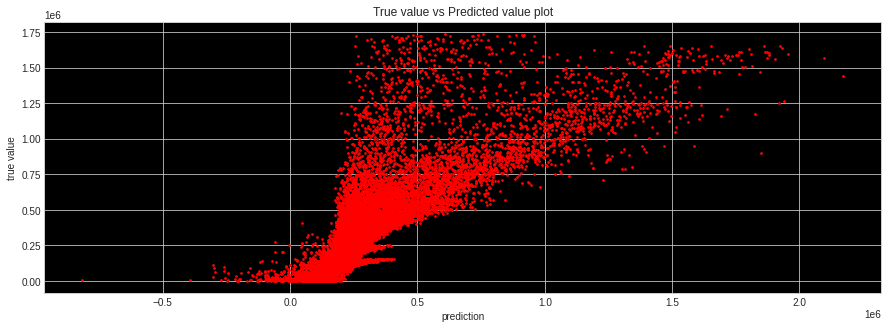

In [ ]:
plt.figure(figsize=(15, 5))
plt.scatter(pred_svm,y_test, c ="red" , s = 3) 
plt.xlabel("prediction") 
plt.ylabel("true value") 

plt.title('True value vs Predicted value plot')
ax = plt.axes()
ax.set_facecolor("black")

plt.show()

The above **scatter plot** of *predicted* vs *true* value is not straight line as we can see.

## 2. K Nearest Neighbours Regressor

### 2.1 Hyperparameter Tuning using Random Search For KNN

The hyperparameters for KNN to be tuned are
* weights - This refers to how should the neighbours of a particular data point be treated. The possible values are
        1. 'uniform' : uniform weights. All points in each neighborhood are weighted equally.

        2. 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
* algorithm - Algorithm used to compute the nearest neighbors
        1. auto - will use most appropriate algorithm based on values passed to *fit* method.
        2. kd_tree - kd_tree will be used.
* n_neighbors - Number of neighbours to consider.
* p - Power parameter for the Minkowski metric.
        1. p = 1 - **Manhattan_distance (l1)** 
        2. p = 2 - **Euclidean_distance (l2)** 
* leaf_size - Leaf size for KDTree. Can affect the speed of the construction and query, as well as the memory required to store the tree. 

In [ ]:
#which weight metric to choose
weights = ['uniform', 'distance']

#degree if kernel is polynomial
algorithm = ['auto', 'kd_tree']


n_neighbors = [3,5,7,1]

#p value
p = [1,2]

# leaf size 
leaf_size = [30,40,20,45]

# Create the grid
dt_grid = {'weights': weights,
           'algorithm': algorithm,
           'n_neighbors': n_neighbors,
           'p' : p,
           'leaf_size' : leaf_size}

In [ ]:
dt_grid

{'algorithm': ['auto', 'kd_tree'],
 'leaf_size': [30, 40, 20, 45],
 'n_neighbors': [3, 5, 7, 1],
 'p': [1, 2],
 'weights': ['uniform', 'distance']}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Create the model to be tuned
dt_base = KNeighborsRegressor()

# Create the random search SVR
dt_random = RandomizedSearchCV(estimator = dt_base, param_distributions = dt_grid, 
                               n_iter = 10, cv = 5)

# Fit the random search model
dt_random.fit(x_train, y_train)

# View the best parameters from the random search
dt_random.best_params_

{'algorithm': 'auto',
 'leaf_size': 40,
 'n_neighbors': 7,
 'p': 1,
 'weights': 'distance'}

The output of above code gives the best hyperparameter values that should be used if one wants high accuracy.

In [ ]:
knr = KNeighborsRegressor(algorithm = 'auto', leaf_size = 40,n_neighbors = 7, p = 1,weights = 'distance')
knr.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=40, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=1,
                    weights='distance')

In [ ]:
print('r2 score on test data', knr.score(x_train,y_train))

r2 score on test data 1.0


In [ ]:
pred_knn = dt_random.predict(x_test)
print('r2 score on test data',r2_score(y_test, pred_knn))

r2 score on test data 0.9537866464125913


The above r2 score of **1** shows us that KNN regressors are able to fit the train data perfectly well but high difference between score of train and test shows that they're not able to generalize well on unseen data.

**Conclusion** - Model overfits and we need to find a better model.



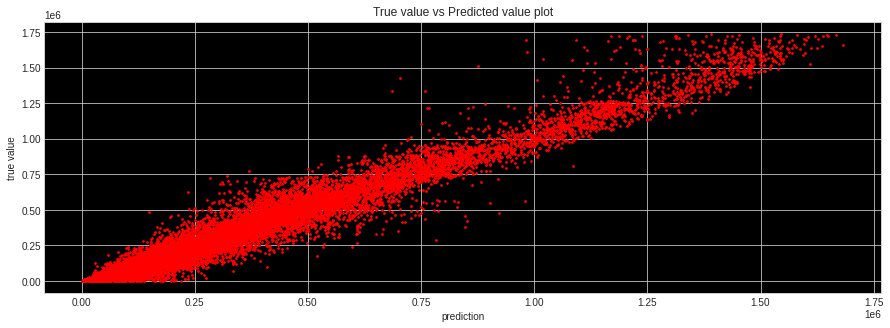

In [ ]:
plt.figure(figsize=(15, 5))
plt.scatter(pred_knn,y_test, c ="red" , s = 3) 
plt.xlabel("prediction") 
plt.ylabel("true value") 

plt.title('True value vs Predicted value plot')
ax = plt.axes()
ax.set_facecolor("black")

plt.show()

The above **scatter plot** of *predicted* vs *true* value is almost a straight line but needs to be improved.

## 3. Random Forest Regressor

### 3.1 Hyperparameter Tuning

In [ ]:
#which weight metric to choose
max_depth = [5,10,4,3]

#degree if kernel is polynomial
criterion = ['mae']


n_estimators = [100, 90, 150, 200]

max_features = ['sqrt', 'log2']

# Create the grid
dt_grid = {'max_depth': max_depth,
           'max_features' : max_features,
           'n_estimators': n_estimators}

In [ ]:
dt_grid

{'max_depth': [5, 10, 4, 3],
 'max_features': ['sqrt', 'log2'],
 'n_estimators': [100, 90, 150, 200]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Create the model to be tuned
dt_base = RandomForestRegressor(verbose=1,n_jobs=-1)

# Create the random search SVR
dt_random = RandomizedSearchCV(estimator = dt_base, param_distributions = dt_grid, 
                               n_iter = 5, cv = 10)

# Fit the random search model
dt_random.fit(x_train, y_train)

# View the best parameters from the random search
dt_random.best_params_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0

{'max_depth': 5, 'max_features': 'log2', 'n_estimators': 150}

In [ ]:
print(dt_random.best_params_)

{'n_estimators': 150, 'max_features': 'log2', 'max_depth': 5}


In [ ]:
print(dt_random.best_score_)

0.967731577597258


In [ ]:
clf = RandomForestRegressor(n_estimators = 100, max_features =  'log2', max_depth =  10)
clf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
acc = clf.score(x_train,y_train)

print("Train R2score" ,acc)

Train R2score 0.999654345661346


In [ ]:
pred_rf = clf.predict(x_test)
print("Test r2score: " , r2_score(y_test, pred_rf))

Test r2score:  0.9995874734350616


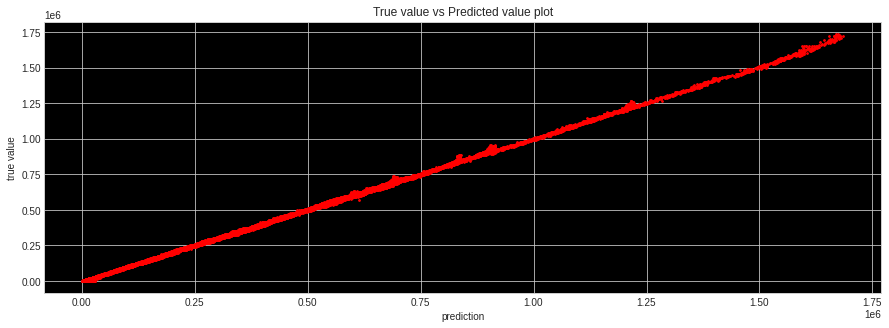

In [ ]:
plt.figure(figsize=(15, 5))
plt.scatter(pred_rf,y_test, c ="red" , s = 3) 
plt.xlabel("prediction") 
plt.ylabel("true value") 

plt.title('True value vs Predicted value plot')
ax = plt.axes()
ax.set_facecolor("black")

plt.show()

### 3.2 Feature Interpretation

In [ ]:
rf_imp = clf.feature_importances_
print(rf_imp)

[1.21857255e-04 3.84318857e-04 6.02413071e-02 3.66125900e-05
 9.48202959e-05 1.65299559e-01 1.53506001e-01 9.67781158e-02
 3.04639263e-01 2.17812475e-01 1.39627204e-04 1.36078535e-04
 2.53310018e-04 1.13533946e-04 1.75534229e-04 2.67585580e-04]


In [ ]:
col = x_train.columns

In [ ]:
i = list(range(0,16))
i

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

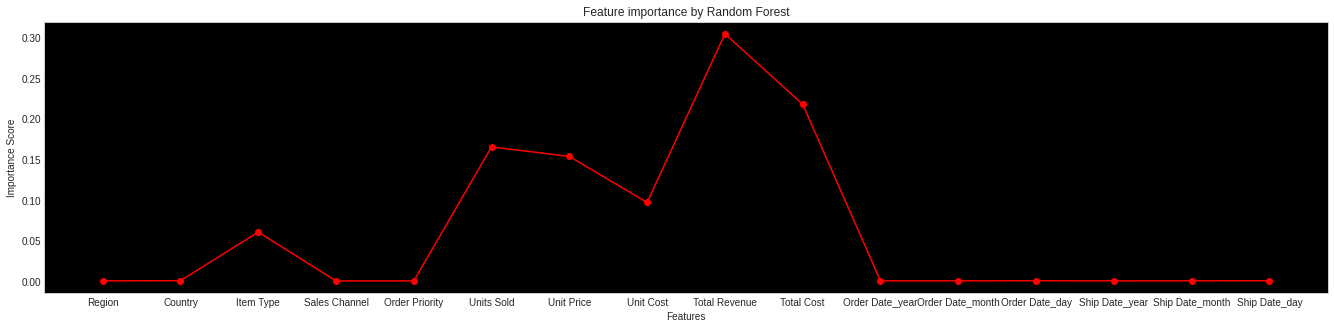

In [ ]:
plt.figure(figsize=(23, 5))
plt.plot(rf_imp, 'r-o')

default_x_ticks = range(len(rf_imp))
plt.xticks(default_x_ticks,col)
plt.title('Feature importance by Random Forest')
plt.xlabel("Features")
plt.ylabel("Importance Score")

ax = plt.axes()
ax.set_facecolor("black")
ax.grid(False)
plt.show()

##4. Gradient Boosting Regression

### 4.1 Hyperparameter Tuning

In [ ]:
#what value of learning rate we choose
learning_rate = [float(x) for x in np.linspace(0.1, 1, 5)]

#no of estimators that are needed
n_estimators = [100, 90, 150, 200]

#how man features should be used in total
max_features = ['sqrt', 'log2']

# Create the grid
dt_grid = {
           'learning_rate' : learning_rate,
           'max_features' : max_features,
           'n_estimators': n_estimators}

In [ ]:
dt_grid

{'learning_rate': [0.1, 0.325, 0.55, 0.775, 1.0],
 'max_features': ['sqrt', 'log2'],
 'n_estimators': [100, 90, 150, 200]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Create the model to be tuned
dt_base = GradientBoostingRegressor(verbose=1)

# Create the random search SVR
dt_random = RandomizedSearchCV(estimator = dt_base, param_distributions = dt_grid, 
                               n_iter = 5, cv = 10,n_jobs = -1)


# Fit the random search model
dt_random.fit(x_train, y_train)

# View the best parameters from the random search
dt_random.best_params_

      Iter       Train Loss   Remaining Time 
         1 122786512678.3833            5.24s
         2 107698780596.1821            4.87s
         3 95119877566.6615            4.91s
         4 80822223460.8148            4.65s
         5 68932821580.6850            4.67s
         6 59962507993.6055            4.90s
         7 54578049466.5997            4.76s
         8 47593014190.1194            4.65s
         9 41670765620.8901            4.86s
        10 37052137690.0489            4.77s
        20 12028302807.1554            4.84s
        30  5190803700.6289            4.35s
        40  2566241663.3009            4.13s
        50  1530851623.5468            3.91s
        60  1106426943.8538            3.70s
        70   763144488.4937            3.40s
        80   606375161.3072            3.11s
        90   535526906.8096            2.83s
       100   475053113.9356            2.56s
       200   192884288.4372            0.00s


{'learning_rate': 0.1, 'max_features': 'log2', 'n_estimators': 200}

In [ ]:
print(dt_random.best_score_)

0.9983810765312434


In [ ]:
clf = GradientBoostingRegressor(verbose=1,learning_rate = 0.325, max_features = 'log2', n_estimators = 200)
clf.fit(x_train,y_train)

      Iter       Train Loss   Remaining Time 
         1 81505477283.4861            6.57s
         2 53397737345.0573            6.20s
         3 35704353518.4920            6.40s
         4 23990248052.6375            6.46s
         5 18001902673.6183            6.33s
         6 14484449102.9480            6.10s
         7 13143032822.2923            5.78s
         8 11942204658.6391            5.66s
         9 10000717399.5005            5.60s
        10  8263552293.3526            5.53s
        20  1676002752.4527            4.95s
        30  1086417854.1626            4.58s
        40   749359424.3712            4.30s
        50   624724777.9462            3.98s
        60   536783448.7205            3.64s
        70   435806626.9520            3.40s
        80   394796603.4803            3.07s
        90   367062505.5168            2.78s
       100   330019318.4212            2.50s
       200   140258257.6791            0.00s


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.325, loss='ls',
                          max_depth=3, max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=1, warm_start=False)

In [ ]:
acc = clf.score(x_train,y_train)

print("r2 score on train data", acc)

r2 score on train data 0.9990183468252108


In [ ]:
pred_gb = clf.predict(x_test)
r2_score(y_test, pred_gb)

0.998942935541743

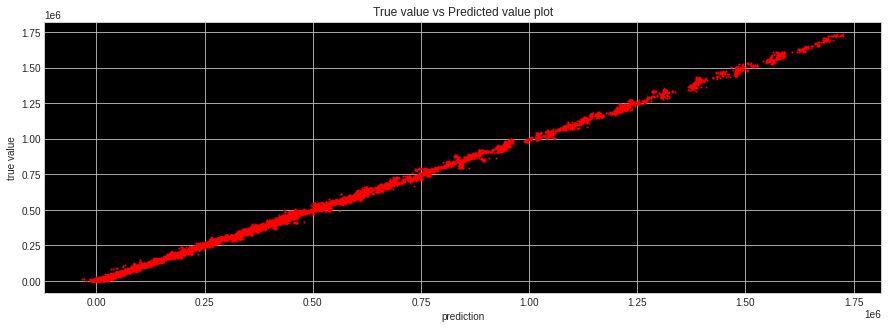

In [ ]:
plt.figure(figsize=(15, 5))
plt.scatter(pred_gb,y_test, c ="red" , s = 1) 
plt.xlabel("prediction") 
plt.ylabel("true value") 

plt.title('True value vs Predicted value plot')
ax = plt.axes()
ax.set_facecolor("black")

plt.show()

### 4.2 Feature Importance

In [ ]:
gb_imp = clf.feature_importances_
print(gb_imp)

[1.97670089e-05 1.00123126e-05 5.52535822e-02 0.00000000e+00
 2.67565363e-06 9.63454293e-02 9.73456485e-02 2.18901230e-02
 4.06039925e-01 3.22834434e-01 4.17447906e-06 2.46752568e-06
 2.92352438e-05 5.38109015e-06 5.60643068e-06 2.11537889e-04]


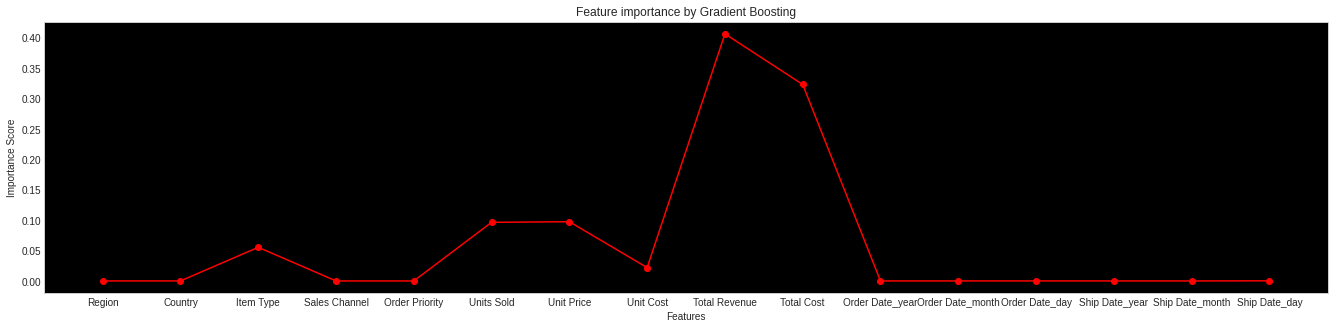

In [ ]:
plt.figure(figsize=(23, 5))
plt.plot(gb_imp, 'r-o')

default_x_ticks = range(len(gb_imp))
plt.xticks(default_x_ticks,col)
plt.title('Feature importance by Gradient Boosting')
plt.xlabel("Features")
plt.ylabel("Importance Score")

ax = plt.axes()
ax.set_facecolor("black")
ax.grid(False)
plt.show()

##5. Ridge Regression


### 5.1 Hyperparameter Tuning 

In [ ]:
from sklearn.linear_model import Ridge
alpha = [float(x) for x in np.linspace(1.5, 2, 5)] 

r2_score_array=[]
for i in alpha:
    clf = Ridge(alpha=i)
    clf.fit(x_train, y_train)
    r2_score_array.append(clf.score(x_train,y_train))
    predict_y = clf.predict(x_test)
    print('For values of alpha = ', i, "The r2score on test data is:",r2_score(y_test, predict_y))

For values of alpha =  1.5 The r2score on test data is: 0.9964564539172455
For values of alpha =  1.625 The r2score on test data is: 0.9960335310934045
For values of alpha =  1.75 The r2score on test data is: 0.9956073258860658
For values of alpha =  1.875 The r2score on test data is: 0.995179399214416
For values of alpha =  2.0 The r2score on test data is: 0.9947510493488755


In [ ]:
best_alpha = np.argmax(r2_score_array)
print(alpha[best_alpha])

1.5


In [ ]:
clf = Ridge(alpha = 0.5)
reg = clf.fit(x_train, y_train)
pred = reg.predict(x_test)
acc = reg.score(x_train,y_train)
print("r2_score on train data",acc)

r2_score on train data 0.9993856237359803


In [ ]:
print("r2_score on test data", r2_score(y_test, pred))

r2_score on test data 0.9993951139336821


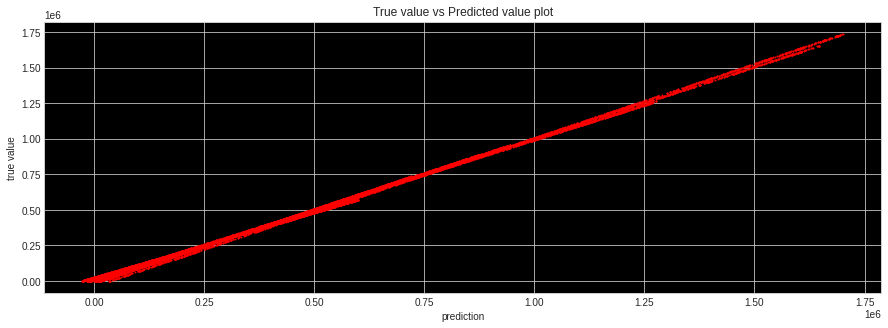

In [ ]:
plt.figure(figsize=(15, 5))
plt.scatter(pred,y_test, c ="red" , s = 1) 
plt.xlabel("prediction") 
plt.ylabel("true value") 

plt.title('True value vs Predicted value plot')
ax = plt.axes()
ax.set_facecolor("black")

plt.show()

### 5.2 Feature Importance

In [ ]:
importance = reg.coef_

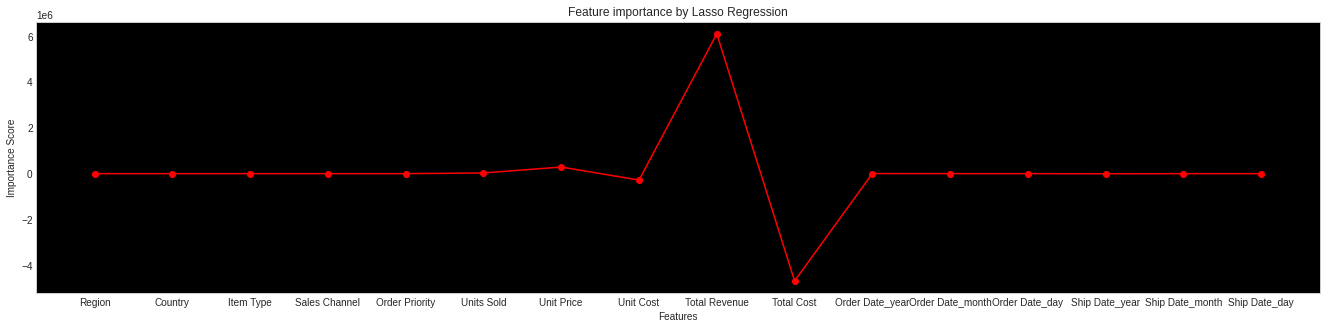

In [ ]:
plt.figure(figsize=(23, 5))
plt.plot(importance, 'r-o')

default_x_ticks = range(len(importance))
plt.xticks(default_x_ticks,col)
plt.title('Feature importance by Ridge Regression')
plt.xlabel("Features")
plt.ylabel("Importance Score")

ax = plt.axes()
ax.set_facecolor("black")
ax.grid(False)
plt.show()

## 6. Decision Trees

### 6.1 Hyperparameter Tuning 

In [20]:
#depth of treeS
max_depth = [int(x) for x in np.linspace(5,55,11)]
max_depth.append(None)

#maximum features to consider at every split
max_features = ['auto', 'sqrt', 'log2', None]
                 

# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(50, 100, 10)]

# Minimum decrease in impurity required for split to happen
min_impurity_decrease = [0.0, 0.05, 0.1]


# Create the grid
dt_grid = {'max_depth': max_depth,
           'max_features': max_features,
           'min_samples_split': min_samples_split,
           'min_impurity_decrease': min_impurity_decrease,
          }

In [21]:
dt_grid

{'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, None],
 'max_features': ['auto', 'sqrt', 'log2', None],
 'min_impurity_decrease': [0.0, 0.05, 0.1],
 'min_samples_split': [50, 55, 61, 66, 72, 77, 83, 88, 94, 100]}

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

# Create the model to be tuned
dt_base = DecisionTreeRegressor()

# Create the random search Random Forest
dt_random = RandomizedSearchCV(estimator = dt_base, param_distributions = dt_grid, 
                               n_iter = 200, cv = 3, verbose = 2, random_state = 42, 
                               n_jobs = -1)

# Fit the random search model
dt_random.fit(x_train, y_train)

# View the best parameters from the random search
dt_random.best_params_

Fitting 3 folds for each of 200 candidates, totalling 600 fits


{'max_depth': 15,
 'max_features': 'auto',
 'min_impurity_decrease': 0.0,
 'min_samples_split': 50}

In [24]:
dt = DecisionTreeRegressor(max_depth =  30,max_features = 'auto', min_impurity_decrease = 0.1, min_samples_split = 50)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=30, max_features='auto',
                      min_impurity_decrease=0.1, min_samples_split=50)

In [25]:
print('r2 score on train data', dt.score(x_train,y_train))

r2 score on train data 0.9998877639866757


In [26]:
pred_dt = dt.predict(x_test)
print('r2 score on test data', r2_score(pred_dt,y_test))

r2 score on test data 0.9998733113192135


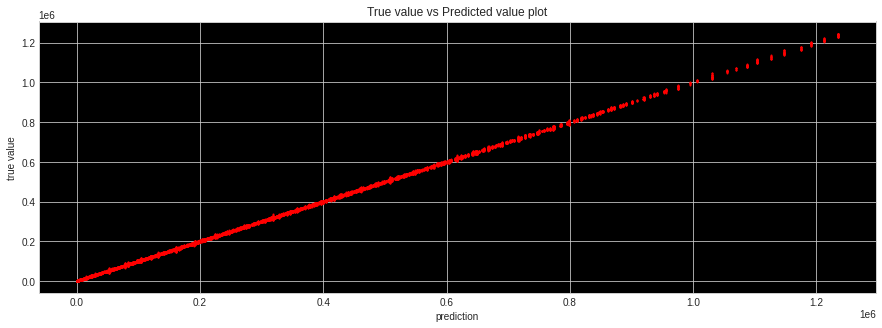

In [27]:
plt.figure(figsize=(15, 5))
plt.scatter(pred_dt,y_test, c ="red" , s = 1) 
plt.xlabel("prediction") 
plt.ylabel("true value") 

plt.title('True value vs Predicted value plot')
ax = plt.axes()
ax.set_facecolor("black")

plt.show()

### 6.2 Feature Importance

In [28]:
dt_imp = dt.feature_importances_
print(dt_imp)

[0.         0.         0.01326103 0.         0.         0.01904996
 0.01507055 0.07504041 0.85866309 0.01891496 0.         0.
 0.         0.         0.         0.        ]


In [30]:
col = x_train.columns

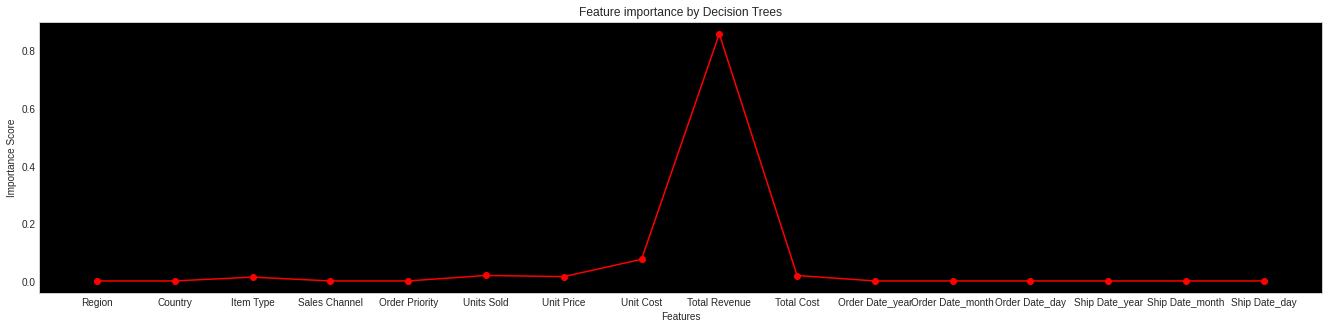

In [31]:
plt.figure(figsize=(23, 5))
plt.plot(dt_imp, 'r-o')

default_x_ticks = range(len(dt_imp))
plt.xticks(default_x_ticks,col)
plt.title('Feature importance by Decision Trees')
plt.xlabel("Features")
plt.ylabel("Importance Score")

ax = plt.axes()
ax.set_facecolor("black")
ax.grid(False)
plt.show()

## Stacking Regression Models

In [ ]:
from sklearn.ensemble import StackingRegressor
estimators = [('svr',svr),('knr', knr),('dt',dt)]

stack = StackingRegressor(estimators = estimators, final_estimator = clf)

In [ ]:
stack.fit(x_train,y_train)

StackingRegressor(cv=None,
                  estimators=[('svr',
                               SVR(C=3.0, cache_size=200, coef0=0.0, degree=6,
                                   epsilon=0.5, gamma='scale', kernel='poly',
                                   max_iter=-1, shrinking=True, tol=0.001,
                                   verbose=False)),
                              ('knr',
                               KNeighborsRegressor(algorithm='auto',
                                                   leaf_size=40,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=7,
                                                   p=1, weights='distance')),
                              ('dt',
                               DecisionTreeRegr...
                                                     min_impurity_decrease=0.1,
            

In [ ]:
pred_stack = stack.predict(x_test)
r2_score(pred_stack,y_test)

0.9999197924643661

In [ ]:
stack.score(x_train,y_train)

0.9999322445821132

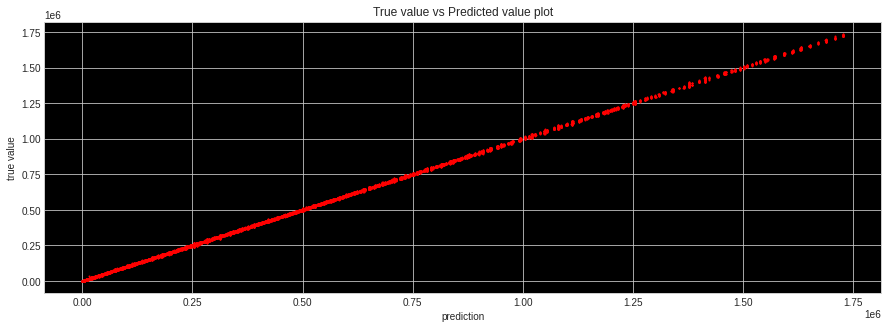

In [ ]:
plt.figure(figsize=(15, 5))
plt.scatter(pred_stack,y_test, c ="red" , s = 1) 
plt.xlabel("prediction") 
plt.ylabel("true value") 

plt.title('True value vs Predicted value plot')
ax = plt.axes()
ax.set_facecolor("black")

plt.show()

## Voting Ensemble

In [ ]:
from sklearn.ensemble import VotingRegressor
VR = VotingRegressor([('lr', clf), ('svr', svr),('knn',knr),('dt',dt)], n_jobs = -1)

In [ ]:
VR.fit(x_train,y_train)
VR.score(x_train,y_train)

0.9748310580660152

In [ ]:
pred_vr = VR.predict(x_test)
r2_score(pred_vr,y_test)

0.9515735073186661

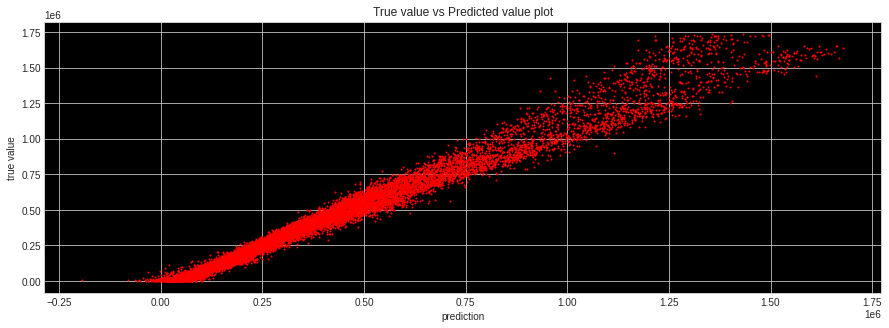

In [ ]:
plt.figure(figsize=(15, 5))
plt.scatter(pred_vr,y_test, c ="red" , s = 1) 
plt.xlabel("prediction") 
plt.ylabel("true value") 

plt.title('True value vs Predicted value plot')
ax = plt.axes()
ax.set_facecolor("black")

plt.show()

### Save the best model for Deployment

In [34]:
import pickle

In [36]:
pickle.dump(dt,open('/content/drive/MyDrive/salesprofit_predictionmodel.pkl' , 'wb'))

In [38]:
df.head(2)

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,0,Namibia,0,0,2,3604,668.27,502.54,2408445.08,1811154.16,597290.92,2015,8,31,2015,10,12
1,1,Iceland,11,1,3,8435,255.28,159.42,2153286.80,1344707.70,808579.10,2010,11,20,2011,1,9


In [43]:
model = pickle.load(open('/content/drive/MyDrive/salesprofit_predictionmodel.pkl','rb'))
print(model.predict([[1,0,0,0,2,3604,668,500,2408666,1811139,2015,7,30,2015,19,12]]))

[599980.4]
